<a href="https://colab.research.google.com/github/SoobinLee1/coding_exercise/blob/main/%EC%99%84%EC%A0%84%ED%83%90%EC%83%89_%EB%8B%A4%EC%9D%B4%EB%82%98%EB%AF%B9_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 완전탐색

완전탐색 아이디어는 모든 경우의 수에 대해서 탐색해야하면서 + gredy choice가 답이 될 수 없는 경우에 사용한다.

그리고 일정한 방향으로 모든 원소들을 탐색할 때 답이 나오는 것이 바로 완전탐색 아이디어이다.



# 다이나믹 프로그래밍

큰 문제를 작은 문제로 나누어서 푸는 방식

점화식으로 표현가능한 프로그래밍 방식, 최적 solution을 구하려고 할 때 이용함

탑다운과 보텀업 과정이 존재하고, 메모리에 담아두는 것으로 반복적인 접근에 대비함.

In [10]:
def Na_solution(array):
  d = [0] * (len(array))
  d[0]=array[0]
  d[1]= max(array[0],array[1])     
  # d 배열은 보텀업 식 dp에서 필요한정보를 테이블에 저장해둠
  
  for i in range(2,len(array)):
    d[i]=max(d[i-1], d[i-2]+array[i])   
  return max(d)

In [11]:
Na_solution([1,3,1,5])

8

In [4]:
import math
array = [1,3,1,5]
temp = 0

def left_side(pivot,array):
  temp = pivot-2
  answer = 0
  while temp>=0:
    answer+=array[temp]
    temp-=2
  return answer

def right_side(pivot,array):
  temp = pivot+2
  answer = 0
  while temp < len(array):
    answer+=array[pivot]
    temp+=2
  return answer

def ant_warrior(array):
  answer = 0
  for i in range(len(array)):
    c = array[i]+left_side(i,array)+right_side(i,array)
    if c > answer:
      answer = c
  return answer

In [5]:
ant_warrior(array)

8

이대로 전개하게 되면 pivot이 증가하면서 테이블 룩업 형태가 아니라 각각 계산이 필요해지므로 불필요한 소비가 반복된다. --> 테이블 룩업을 고려해봐야하는 이유

## 1로 만들기
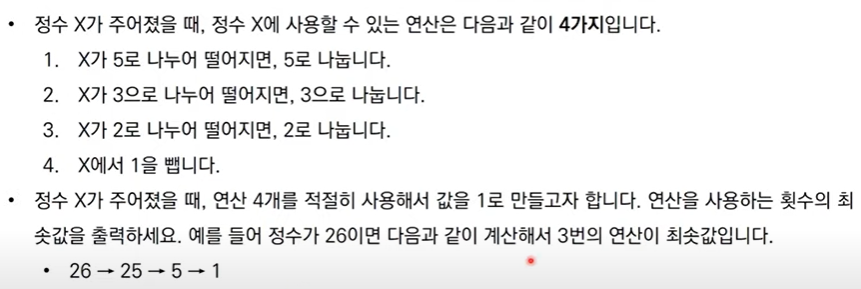

In [25]:
def to_1(x):
  d = [0]*(x+1)
  d[-1]=math.inf
  for i in range(2,x+1):
    d[i]=min(d[i-1],d[i//5 if i%5==0 else -1],
             d[i//3 if i%3==0 else -1],d[i//2 if i%2==0 else -1])+1
    print(d[i])
  return d[x]

In [27]:
to_1(30)

1
1
2
1
2
3
3
2
2
3
3
4
4
2
3
4
3
4
3
4
4
5
4
2
3
3
4
5
3


3